Chloe Quinto    
CPE 695/WS  
HW2   
February 12, 2020   
I pledge my honor that I have abided by the Stevens Honor System - Chloe Quinto 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

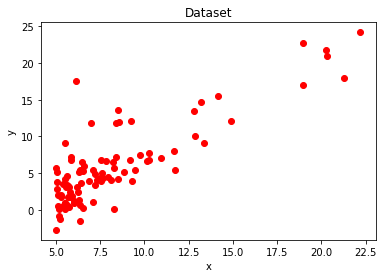

In [2]:
"""
In this problem, we write a program to find the coefficients for a linear regression model for the dataset
provided by (data2.txt). Assume a linear model: y = w0 + w1* x
"""


data = pd.read_csv("data2.txt", header = None)

x = np.array(data[0])
y = np.array(data[1])

plt.scatter(x,y,color='red')
plt.title("Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

---

### Calculate the Normal Equation 

<img src="images/normalEquation.png">

In [3]:
def normal_equation(x,y):
    m = len(x)
    x_bias = np.c_[np.ones((m, 1)), x] 
    
    left_equation = np.linalg.inv(x_bias.T.dot(x_bias))
    right_equation = (x_bias.T).dot(y)
    
    theta = left_equation.dot(right_equation)
    return theta

In [4]:
a, b = normal_equation(x,y)

print("Normal Equation")
print("y = " + str(a) + " + " + str(b) + "*x")

y = a+b*x 

Normal Equation
y = -3.8957808783119106 + 1.1930336441895983*x


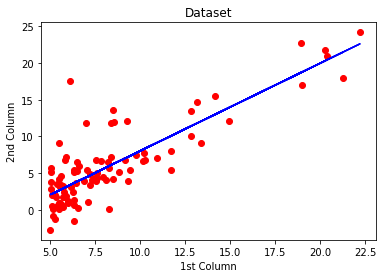

In [5]:
x_original = np.array(data[0])
y_original = np.array(data[1])


plt.scatter(x_original, y_original, color="red")
plt.plot(x,y,color='blue') 
plt.xlim(4.5)
plt.title("Dataset")
plt.xlabel("1st Column")
plt.ylabel("2nd Column")
plt.show()

---

###  Now we need to find Gradient Descent Using Batch and Stochastic Modes 

In [6]:
def cost_function(x, y, theta):
    #calculates the MSE cost function 
    num_samples = len(x) 
    cost_sum = 0.0
    for a,b in zip(x, y):
        feature_vector = np.array([1.0,a])
        cost_sum += (np.dot(theta, feature_vector) - b) ** 2 # (θ^T*x -y)^2
    cost = cost_sum / (num_samples * 2.0) # (1/m)Σ(θ^T*x -y)^2
    
    return cost

In [7]:
def batch_gradient_descent(x, y, theta, alpha, max_iter):
    # calculates the batch gradient descent 
    
    iteration,m = 0,len(x)
    cost = np.zeros(max_iter)
    params_store = np.zeros([2, max_iter])
    
    for i in range(1,max_iter):
        cost[iteration] = cost_function(x, y, theta)
        params_store[:, iteration] = theta
        
        print("iteration: " + str(iteration) + " cost: " + str(cost[iteration]))
        
        for a,b in zip(x, y):
            feature_vector = np.array([1.0, a]) 
            y_hat = np.dot(theta, np.array([1.0, a])) 
            gradient = feature_vector * (b - y_hat)
            theta += alpha * gradient/m
            
        iteration += 1
    
    return theta, cost, params_store



In [8]:
'''
We need to split our data into training and testing 

We can use the function train_test_split() to split our data and specify the test size to extract 
'''
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20)


In [9]:
'''
Batch Gradient Descent
'''
theta = np.array([20.0, 80.0])
alpha_batch = 1e-3
max_iterations = 100

params_hat_batch, cost_batch, params_store_batch =batch_gradient_descent(x_train, y_train, theta, alpha_batch, max_iterations)


iteration: 0 cost: 260689.54800520284
iteration: 1 cost: 222195.24896783347
iteration: 2 cost: 189385.55536611506
iteration: 3 cost: 161421.00387924552
iteration: 4 cost: 137586.09695319275
iteration: 5 cost: 117270.99647807234
iteration: 6 cost: 99955.92080187995
iteration: 7 cost: 85197.84587292324
iteration: 8 cost: 72619.17025515348
iteration: 9 cost: 61898.054006917526
iteration: 10 cost: 52760.184239983166
iteration: 11 cost: 44971.756677766585
iteration: 12 cost: 38333.4936434276
iteration: 13 cost: 32675.545425895947
iteration: 14 cost: 27853.14457340797
iteration: 15 cost: 23742.90192803453
iteration: 16 cost: 20239.649633840436
iteration: 17 cost: 17253.75034582218
iteration: 18 cost: 14708.803794676658
iteration: 19 cost: 12539.69202894135
iteration: 20 cost: 10690.913321225195
iteration: 21 cost: 9115.16211082365
iteration: 22 cost: 7772.11864994005
iteration: 23 cost: 6627.4173860798255
iteration: 24 cost: 5651.76768621475
iteration: 25 cost: 4820.204406036572
iteration: 2

In [10]:
def lin_reg_stoch_gradient_descent(input_var, output_var, params, alpha):
    """Compute the params for linear regression using stochastic gradient descent"""
    num_samples = len(input_var)
    cost = np.zeros(num_samples)
    params_store = np.zeros([2, num_samples])
    
    iteration = 0
    for x,y in zip(input_var, output_var):
        cost[iteration] = cost_function(input_var, output_var, params)
        params_store[:, iteration] = params
        
        print("iteration: " + str(iteration) + " cost: " + str(cost[iteration]))
        
        y_hat = np.dot(params, np.array([1.0, x]))
        gradient = np.array([1.0, x]) * (y - y_hat)
        params += alpha * gradient/num_samples
        
        iteration += 1
            
    return params, cost, params_store

In [11]:
'''
Stochastic Gradient Descent
'''

alpha_stoch = 1e-3
theta = np.array([20.0, 80.0])
params_hat, cost, params_store = lin_reg_stoch_gradient_descent(x_train, y_train, theta, alpha_stoch)



iteration: 0 cost: 260689.54800520284
iteration: 1 cost: 260509.3782971971
iteration: 2 cost: 260291.180418377
iteration: 3 cost: 259904.73052486748
iteration: 4 cost: 258555.23454677168
iteration: 5 cost: 258210.8250768623
iteration: 6 cost: 258022.49184791034
iteration: 7 cost: 255032.12190832073
iteration: 8 cost: 254658.61162932095
iteration: 9 cost: 254369.1429310248
iteration: 10 cost: 253956.43424023542
iteration: 11 cost: 253635.40953111474
iteration: 12 cost: 253143.06382380877
iteration: 13 cost: 252968.70162145328
iteration: 14 cost: 249780.4823979593
iteration: 15 cost: 249560.48805489193
iteration: 16 cost: 249279.285089403
iteration: 17 cost: 248655.3768048085
iteration: 18 cost: 248451.73320970254
iteration: 19 cost: 248163.07325764993
iteration: 20 cost: 247952.14196910846
iteration: 21 cost: 247394.60530254318
iteration: 22 cost: 247196.40342057578
iteration: 23 cost: 246994.60720268512
iteration: 24 cost: 246487.76775007826
iteration: 25 cost: 246258.7550760287
iterat

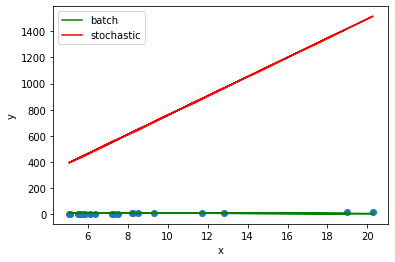

batch      T0, T1: 11.522962445028496, -0.35670241010742115
stochastic T0, T1: 19.36684535499721, 73.82578459849047
batch rms:      6.913583597865994
stochastic rms: 712.9357650034354


In [12]:
plt.scatter(x_test, y_test)
plt.plot(x_test, params_hat_batch[0] + params_hat_batch[1]*x_test, 'g', label='batch')
plt.plot(x_test, params_hat[0] + params_hat[1]*x_test, '-r', label='stochastic')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print(f'batch      T0, T1: {params_hat_batch[0]}, {params_hat_batch[1]}')
print(f'stochastic T0, T1: {params_hat[0]}, {params_hat[1]}')
rms_batch = np.sqrt(np.mean(np.square(params_hat_batch[0] + params_hat_batch[1]*x_test - y_test)))
rms_stochastic = np.sqrt(np.mean(np.square(params_hat[0] + params_hat[1]*x_test - y_test)))
print(f'batch rms:      {rms_batch}')
print(f'stochastic rms: {rms_stochastic}')

Batch Gradient Descent is a lot better 

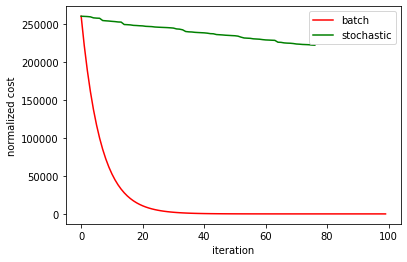

min cost with BGD: 0.0
min cost with SGD: 222531.30369119544


In [13]:
plt.plot(np.arange(max_iterations), cost_batch, 'r', label='batch')
plt.plot(np.arange(len(cost)), cost, 'g', label='stochastic')
plt.xlabel('iteration')
plt.ylabel('normalized cost')
plt.legend()
plt.show()
print(f'min cost with BGD: {np.min(cost_batch)}')
print(f'min cost with SGD: {np.min(cost)}')